# Read data from csv file

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataAuto = pd.read_csv("AutoDSE.csv")

In [3]:
type(dataAuto)

pandas.core.frame.DataFrame

In [5]:
dataAuto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,13.0,8,360,175,3821,11.0
1,15.0,8,390,190,3850,8.5
2,17.0,8,304,150,3672,11.5
3,19.4,6,232,90,3210,17.2
4,24.3,4,151,90,3003,20.1


In [6]:
dataAuto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
mpg             30 non-null float64
cylinders       30 non-null int64
displacement    30 non-null int64
horsepower      30 non-null int64
weight          30 non-null int64
acceleration    30 non-null float64
dtypes: float64(2), int64(4)
memory usage: 1.5 KB


In [7]:
dataAuto = dataAuto[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

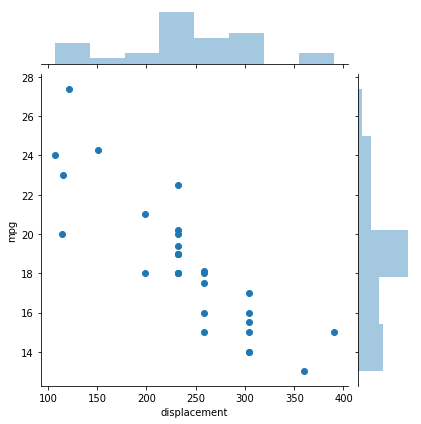

In [9]:
sns.jointplot(dataAuto.displacement, dataAuto.mpg )

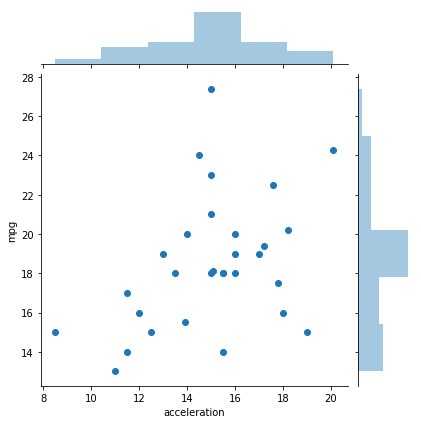

In [10]:
sns.jointplot(dataAuto.acceleration, dataAuto.mpg )

In [11]:
dataAuto.displacement.corr(dataAuto.mpg)

-0.8577514485555104

In [12]:
dataAuto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.847092,-0.857751,-0.749640,-0.777886,0.409395
cylinders,-0.847092,1.000000,0.940695,0.819409,0.808110,-0.547162
displacement,-0.857751,0.940695,1.000000,0.832935,0.826146,-0.484172
horsepower,-0.749640,0.819409,0.832935,1.000000,0.759247,-0.743887
weight,-0.777886,0.808110,0.826146,0.759247,1.000000,-0.244026
acceleration,0.409395,-0.547162,-0.484172,-0.743887,-0.244026,1.000000


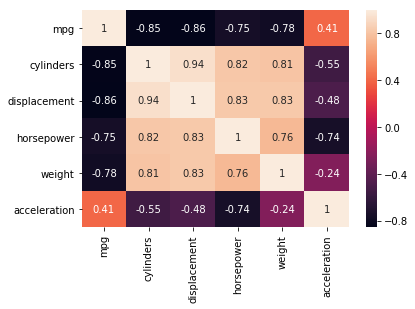

In [13]:
sns.heatmap(dataAuto.corr(), annot=True)

# Simple Linear Regression: mpg on displacement

In [14]:
import statsmodels.api as sm # Regression Library

In [17]:
from __future__ import print_function

In [18]:
from patsy import dmatrices

In [19]:
displ = dataAuto['displacement']
type(displ)

pandas.core.series.Series

In [20]:
mpg = dataAuto[['mpg']]

In [21]:
from statsmodels.formula.api import ols
model1 = ols('mpg ~ displ', data=dataAuto).fit() #mpg on dipl
#ordinary least square

In [22]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     77.96
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           1.39e-09
Time:                        21:07:08   Log-Likelihood:                -58.493
No. Observations:                  30   AIC:                             121.0
Df Residuals:                      28   BIC:                             123.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.5089      1.179     24.188      0.0

In [23]:
mpgpred = model1.predict()
print(mpgpred)

[13.46968441 12.21642014 15.80911106 18.81694531 22.20075885 17.73078294
 18.81694531 20.19553602 18.81694531 18.81694531 18.81694531 20.19553602
 18.81694531 18.81694531 18.81694531 17.73078294 18.81694531 15.80911106
 17.73078294 17.73078294 15.80911106 15.80911106 15.80911106 18.81694531
 17.73078294 15.80911106 23.45402313 24.03887979 23.74645146 23.70467598]


In [24]:
dataAuto['mpgPred'] = mpgpred

In [25]:
dataAuto['res'] = dataAuto.mpg - dataAuto.mpgPred

In [26]:
dataAuto['res'].mean()

1.355952387408858e-14

In [27]:
newData = {'displ': [350, 300, 250]}
newData = pd.DataFrame(data=newData)

In [28]:
mpgnewpred =  model1.predict(newData) # predict out of sample
print(mpgnewpred)

0    13.887439
1    15.976213
2    18.064987
dtype: float64


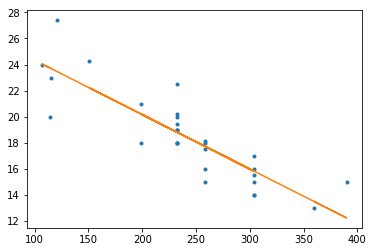

In [29]:
import matplotlib.pyplot as plt

plt.plot(displ, mpg, '.')
plt.plot(displ, mpgpred, '-')
plt.show()

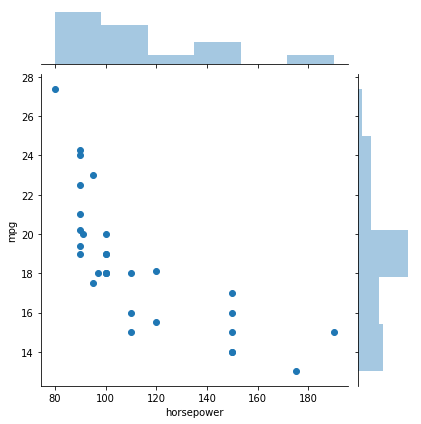

In [30]:
sns.jointplot(dataAuto.horsepower, dataAuto.mpg )

In [31]:
from statsmodels.stats.api import anova_lm

In [32]:
aov_table = sm.stats.anova_lm(model1)

In [33]:
print(aov_table)

            df      sum_sq     mean_sq          F        PR(>F)
displ      1.0  241.476175  241.476175  77.955272  1.394943e-09
Residual  28.0   86.733491    3.097625        NaN           NaN


# SLR: mpg on horsepower, weight, acceleration

In [34]:
hp = dataAuto[['horsepower']]
model2 = ols('mpg ~ hp', data=dataAuto).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     35.92
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           1.86e-06
Time:                        21:07:25   Log-Likelihood:                -66.073
No. Observations:                  30   AIC:                             136.1
Df Residuals:                      28   BIC:                             138.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.3680      1.698     16.705      0.0

In [35]:
mpghpred=model2.predict()
print(mpghpred)

[13.00348625 11.6865277  15.19841715 20.46625134 20.46625134 17.83233424
 20.46625134 20.46625134 19.58827897 19.58827897 19.58827897 19.85167068
 19.58827897 19.58827897 20.46625134 18.71030661 19.58827897 15.19841715
 18.71030661 18.71030661 17.83233424 15.19841715 15.19841715 20.46625134
 20.02726515 15.19841715 21.3442237  20.46625134 20.3784541  20.02726515]


In [36]:
mpghres=dataAuto.mpg-mpghpred
print(mpghres)
print(mpghres.sum())

0    -0.003486
1     3.313472
2     1.801583
3    -1.066251
4     3.833749
5     0.267666
6    -0.266251
7     0.533749
8    -0.588279
9    -1.588279
10    0.411721
11   -1.851671
12   -1.588279
13   -0.588279
14    2.033749
15   -0.710307
16   -1.588279
17   -1.198417
18   -2.710307
19   -3.710307
20   -2.332334
21   -0.198417
22   -1.198417
23   -1.466251
24   -2.527265
25    0.801583
26    6.055776
27    3.533749
28   -0.378454
29    2.972735
Name: mpg, dtype: float64
-1.3145040611561853e-13


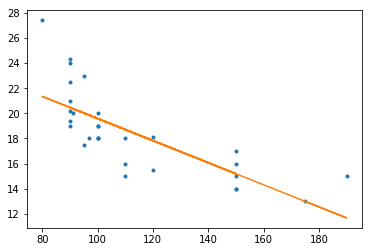

In [37]:
plt.plot(dataAuto.horsepower, mpg, '.')
plt.plot(dataAuto.horsepower, mpghpred, '-')
plt.show()

In [38]:
wt = dataAuto[['weight']]
model3 = ols('mpg ~ wt', data=dataAuto).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     42.91
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           4.22e-07
Time:                        21:07:29   Log-Likelihood:                -64.518
No. Observations:                  30   AIC:                             133.0
Df Residuals:                      28   BIC:                             135.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.8456      2.678     13.387      0.0

In [39]:
aov_table0 = sm.stats.anova_lm(model2)
print(aov_table0)

            df      sum_sq     mean_sq         F    PR(>F)
hp         1.0  184.440630  184.440630  35.92107  0.000002
Residual  28.0  143.769037    5.134608       NaN       NaN


In [40]:
acc = dataAuto[['acceleration']]
model4 = ols('mpg ~ acc', data=dataAuto).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     5.638
Date:                Mon, 21 Jan 2019   Prob (F-statistic):             0.0247
Time:                        21:07:30   Log-Likelihood:                -75.703
No. Observations:                  30   AIC:                             155.4
Df Residuals:                      28   BIC:                             158.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5258      3.405      3.091      0.0

# Multiple Regression: mpg on several predictors

In [41]:
model5 = ols('mpg ~ horsepower + weight', data=dataAuto).fit()

In [42]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     26.78
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           3.90e-07
Time:                        21:07:32   Log-Likelihood:                -62.059
No. Observations:                  30   AIC:                             130.1
Df Residuals:                      27   BIC:                             134.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.4319      2.593     13.276      0.0

In [43]:
#model6 = ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration', data=dataAuto).fit()
#model6 = ols('mpg ~ cylinders + displacement + weight + acceleration', data=dataAuto).fit()
#model6 = ols('mpg ~ displacement + weight + acceleration', data=dataAuto).fit()
model6 = ols('mpg ~weight + acceleration', data=dataAuto).fit()

In [44]:
#print(model6.summary())

In [45]:

aov_table = sm.stats.anova_lm(model6)
#print(aov_table)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
variables = model6.model.exog

In [48]:
# print(variables) 

In [49]:
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[106.78577806011681, 1.0633191604312853, 1.0633191604312857]

In [50]:
model7 = ols('mpg ~ weight + acceleration', data=dataAuto).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     25.79
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           5.46e-07
Time:                        21:07:38   Log-Likelihood:                -62.432
No. Observations:                  30   AIC:                             130.9
Df Residuals:                      27   BIC:                             135.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       30.0293      3.856      7.788   

# Transformation

In [51]:
dataAuto['invmpg'] = 1/dataAuto.mpg 

In [52]:
model8 = ols('invmpg ~ weight + acceleration', data=dataAuto).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                 invmpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     41.13
Date:                Mon, 21 Jan 2019   Prob (F-statistic):           6.38e-09
Time:                        21:07:40   Log-Likelihood:                 117.83
No. Observations:                  30   AIC:                            -229.7
Df Residuals:                      27   BIC:                            -225.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0215      0.009      2.264   

# Residual Plot

In [53]:
mpgpred7 = model7.predict()
print(mpgpred7)

[14.26653832 13.36468403 15.16246981 19.19688296 21.10930203 17.56166425
 19.22482902 21.33904855 20.80345098 20.63448117 20.312642   20.8608238
 20.15773712 20.37760212 19.94261036 19.31584601 18.29240086 15.16246981
 17.33039958 17.14347758 14.44002513 14.36592213 13.45037394 19.13133056
 19.46349718 16.50812517 21.22911605 22.27699103 21.36606874 21.10918969]


In [54]:
mpgres7 = model7.resid
print(mpgres7)

0    -1.266538
1     1.635316
2     1.837530
3     0.203117
4     3.190698
5     0.538336
6     0.975171
7    -0.339049
8    -1.803451
9    -2.634481
10   -0.312642
11   -2.860824
12   -2.157737
13   -1.377602
14    2.557390
15   -1.315846
16   -0.292401
17   -1.162470
18   -1.330400
19   -2.143478
20    1.059975
21    0.634078
22    0.549626
23   -0.131331
24   -1.963497
25   -0.508125
26    6.170884
27    1.723009
28   -1.366069
29    1.890810
dtype: float64


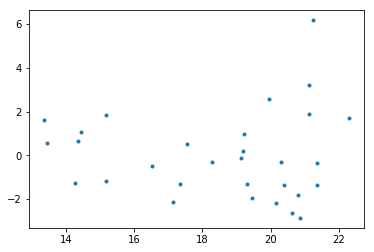

In [55]:
plt.plot(mpgpred7, mpgres7, '.')
plt.show()

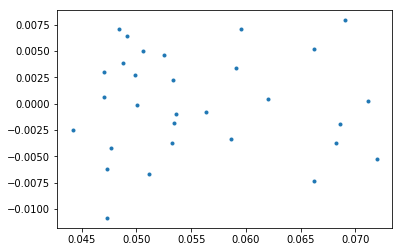

In [56]:
mpgpred8 = model8.predict()
mpgres8 = model8.resid
plt.plot(mpgpred8, mpgres8, '.')
plt.show()